In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from PIL import Image
from torchvision import transforms
import torch.nn.functional as F
import cv2
import torch

cuhk_dir1 = "/home/linhuadong/DNFNet/jobs/cuhk_t_3_alpha_0p3/evaluate_result.pkl"
prw_dir3 = '/home/linhuadong/DNFNet/jobs/prw_SC_STC_0p001/evaluate_result_test.pkl'
with open(prw_dir3, "rb") as file:
    prw_evaluate3 = pickle.load(file)

with open(cuhk_dir1, "rb") as file:
    cuhk_evaluate1 = pickle.load(file)


/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


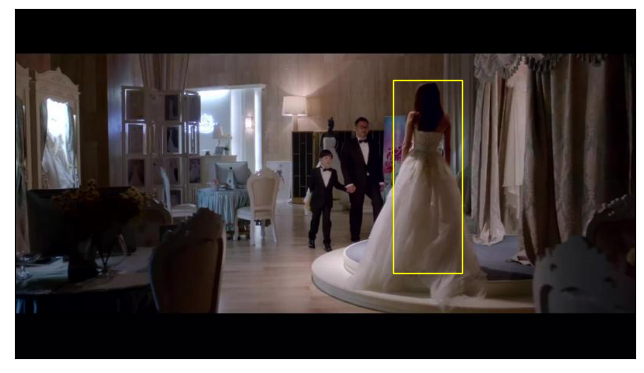

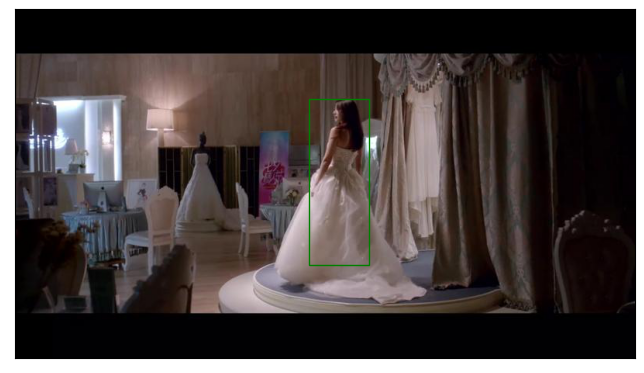

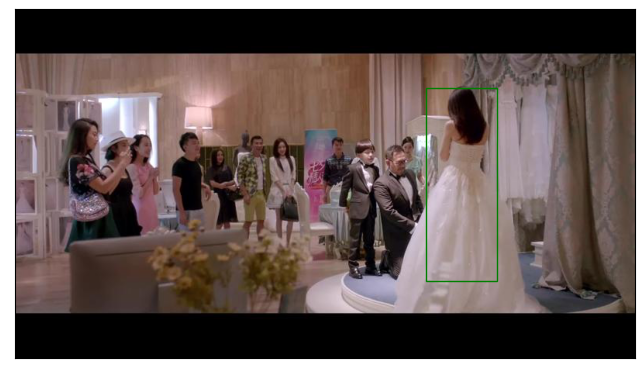

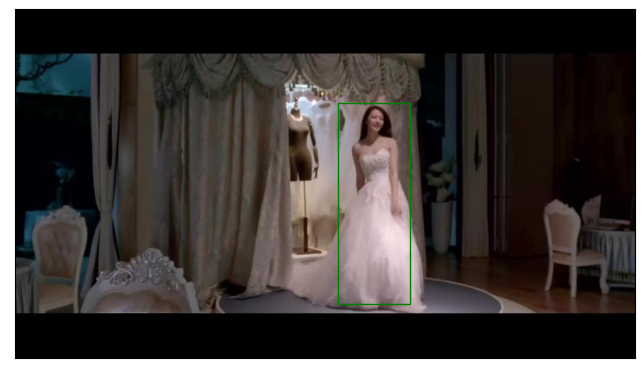

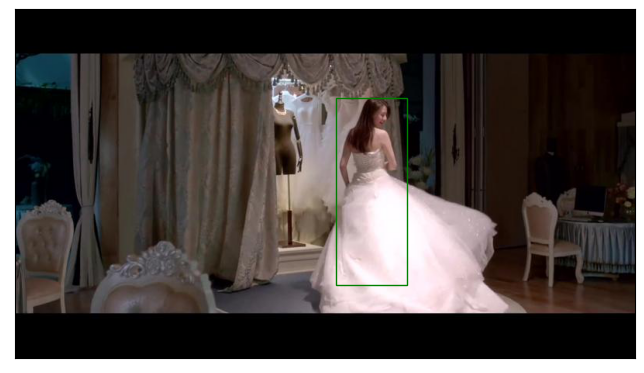

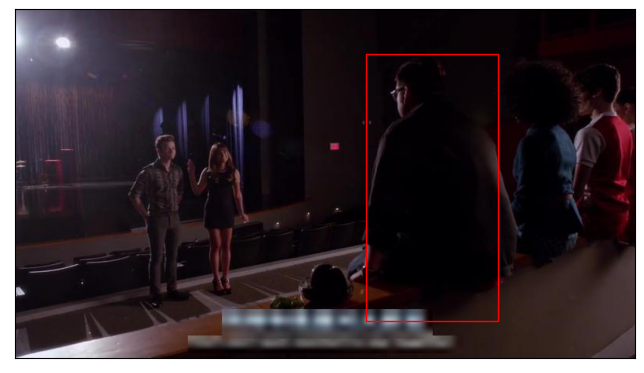

In [2]:
def visualize(image_root, probe_img, probe_roi, color):
    file_root = os.path.join(image_root, probe_img)
    img = Image.open(file_root)
    plt.figure(figsize=(8, 8))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    ax = plt.gca()
    down_left_x, down_left_y = probe_roi[0], probe_roi[1]
    width = probe_roi[2] - probe_roi[0]
    height = probe_roi[3] - probe_roi[1]
    rect = plt.Rectangle((down_left_x, down_left_y), width, height, fill=False, edgecolor=color, linewidth=1)
    ax.add_patch(rect)
    plt.savefig('tmp.png')
    tmp = Image.open("tmp.png")
    return tmp

def search(results, image_root):
    colors = ['red', 'green', 'yellow']
    # print("ap:{}, acc:{}".format(results['ap'], results['acc']))
    search_result = []
    img = visualize(image_root, results['probe_img'], results['probe_roi'], colors[2]) # query
    search_result.append(img)
    for j in range(0, 5):
        info = results['gallery'][j]
        img = visualize(image_root, info['img'], info['roi'][:4], colors[info['correct']])  # gallery
        search_result.append(img)
    # cat_image(search_result)
    return True


def search_dataset(evaluate):
    results = evaluate['results']
    image_root = evaluate['image_root']
    for idx in range(0, len(results)):
        search(results[idx], image_root)
        break

search_dataset(cuhk_evaluate1)   # ['cuhk_evaluate1', 'prw_evaluate3']
